# **Project 1**

### **Preprocessing of the Data**


The set of data that we chose is the set : **Cardiovascular Diseases Risk Prediction Dataset** that we found on the following link : https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

The dataset contains 308 854 lines which each one represents a patient.


The dataset contains 19 features on the vital status of the patient such that : General Health, Heart Disease, Skin Cancer, Depression, Diabetes, Arthritis. We have also information on the information about the lifestyle of the patient such that : Exercise, Weight, Height, Age category, Smoking History, Alcohol Consumption, Fruit Consumption, Vegetables Consumption and Fried Potato Consumption.

The dataset does not contain any row with missing data.

In [67]:
import pandas as pd

diseases_df = pd.read_csv("CVD_cleaned.csv")
print(f"Number of lines : {diseases_df.shape[0]}")
print(f"Number of features : {diseases_df.shape[1]}")

print(f"Number of lines with missing data : {diseases_df.isna().sum(axis=1).astype(bool).sum()}")

Number of lines : 308854
Number of features : 19
Number of lines with missing data : 0


**Transformation of the data**:

1) Convertion of the string gender to a binary value: Change the name of the column "Sex" to "Is_Male". "0" represents a female patient and "1" represents a male patient.


2) Convertion of the interval of ages to a value : Change the name of "Age_Category" to "Age" and take the middle of the interval of ages. For example : "70-74" becomes 72. For the category "80+" we chose the value 85.


3) Convert the binary features with Yes/No values to binary values: convert "Yes" to 1 and "No" to 0. For the case of the feature "Diabetes", we convert "yes" and "no" like the other features and "Yes, but female told only during pregnancy" to 2 and "No, pre-diabetes or borderline diabetes" to 3.

4) Convert the string state of the feature "General Health" to categorial number : Convert "Poor" to 0, "Fair" to 1, "Good" to 2, "Very Good" to 3 and "Excellent" to 4

In [68]:
#Transfomation of the data according to the detailed sections.

#1)

diseases_df.rename(columns={'Sex': 'Is_Male'}, inplace=True)
diseases_df['Is_Male'] = diseases_df['Is_Male'].map({'Male': 1, 'Female': 0})

#2)
def convert_age(age_category):
  if age_category != "80+":
    ages = [int(age) for age in age_category.split('-')]
    average_age = sum(ages) / len(ages)
  else:
    average_age = 85
  return int(average_age)

diseases_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
diseases_df['Age'] = diseases_df['Age'].apply(convert_age)

#3)
binary_features = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                   'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

for feature in binary_features:
  diseases_df[feature] = diseases_df[feature].map({'Yes': 1, 'Yes, but female told only during pregnancy': 2,
                                                   'No, pre-diabetes or borderline diabetes': 3, 'No': 0})

#4)
diseases_df['General_Health'] = diseases_df['General_Health'].map({'Excellent': 4, 'Very Good': 3,
                                                            'Good': 2, 'Fair': 1, 'Poor': 0})
diseases_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,72,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,72,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,62,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,85,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,Within the past year,1,0,0,0,0,0,0,1,27,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,Within the past 5 years,1,0,0,0,0,1,0,1,67,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,3,5 or more years ago,1,0,0,0,1,2,0,0,32,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,3,Within the past year,1,0,0,0,0,0,0,1,67,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [69]:
#Checking the types of the data and transforming object to relevant type.

diseases_df.dtypes

General_Health                    int64
Checkup                          object
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Is_Male                           int64
Age                               int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [70]:
#Transform the type of the feature "Chcekup" from object to string

diseases_df = diseases_df.astype({'Checkup': 'string'})
diseases_df.dtypes

General_Health                    int64
Checkup                          string
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Is_Male                           int64
Age                               int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

**This is the final schema of the dataset** :

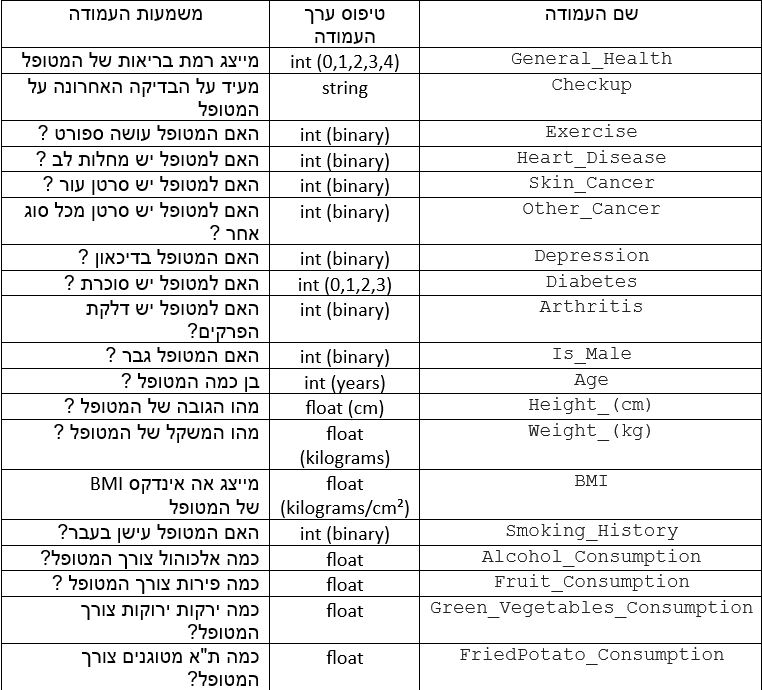

**Number of rows after transformations** : 308 853

### **First examination of the Data**

####Numeric Values

As we saw earlier, there is not missing data : all the lines are full of data.

count    308854.000000
mean        170.615249
std          10.658026
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         241.000000
Name: Height_(cm), dtype: float64



[]

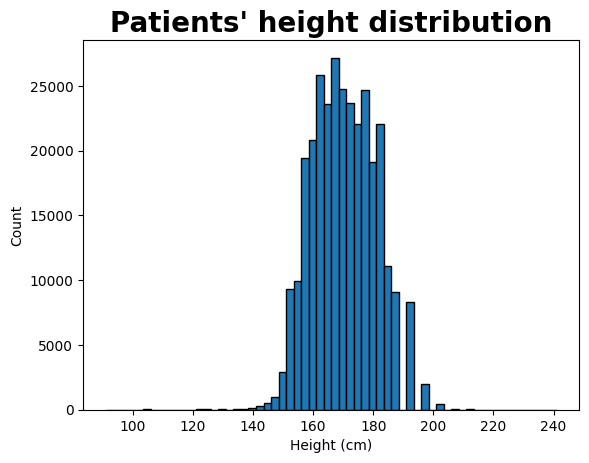

In [71]:
import matplotlib.pyplot as plt

#Distribution of the values of the features "Height_(cm)"

print(diseases_df['Height_(cm)'].describe())
print()

diseases_df['Height_(cm)'].hist(bins=60, edgecolor="black", grid=False)
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.title("Patients' height distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the height of the principal "mass" is between 150 and 190 cm. We can see that there are outlier values such that around 100 cm, 120 cm and 200cm and more.

count    308854.000000
mean         83.588655
std          21.343210
min          24.950000
25%          68.040000
50%          81.650000
75%          95.250000
max         293.020000
Name: Weight_(kg), dtype: float64



[]

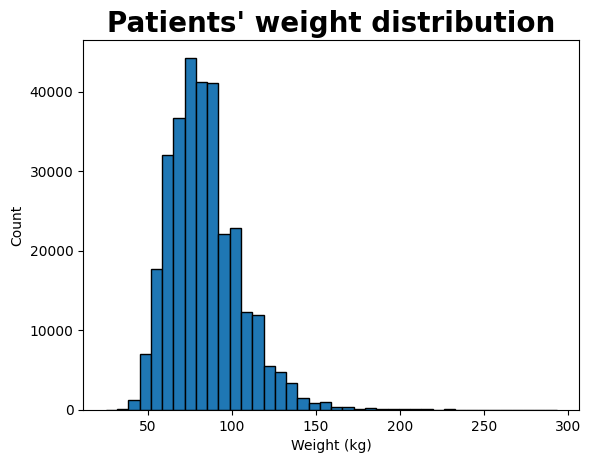

In [72]:
#Distribution of the values of the features "Weight"

print(diseases_df['Weight_(kg)'].describe())
print()

diseases_df['Weight_(kg)'].hist(bins=40, edgecolor="black", grid=False)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.title("Patients' weight distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the weight of the principal "mass" is between 55kg and 120 kg. We can see that there are outlier values such that around 25kg and more than 150 kg.

count    308854.000000
mean         28.626211
std           6.522323
min          12.020000
25%          24.210000
50%          27.440000
75%          31.850000
max          99.330000
Name: BMI, dtype: float64



[]

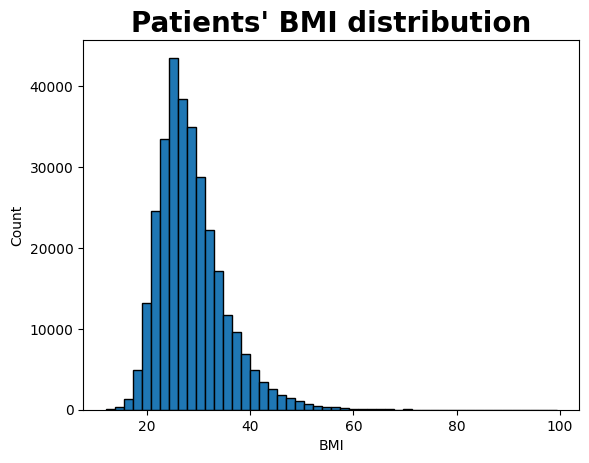

In [73]:
#Distribution of the values of the features "BMI"

print(diseases_df['BMI'].describe())
print()

diseases_df['BMI'].hist(bins=50, edgecolor="black", grid=False)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Patients' BMI distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the BMI of the principal "mass" is between 18 and 45. We can see that there are outlier values such that around 70 and more.

count    308854.000000
mean          5.096366
std           8.199763
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max          30.000000
Name: Alcohol_Consumption, dtype: float64



[]

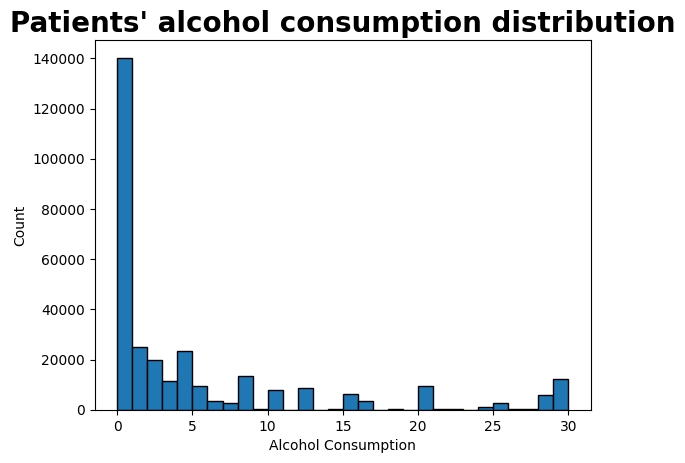

In [74]:
#Distribution of the values of the features "Alcohol_Consumption"

print(diseases_df['Alcohol_Consumption'].describe())
print()

diseases_df['Alcohol_Consumption'].hist(bins=30, edgecolor="black", grid=False)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Patients' alcohol consumption distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the alcohol consumption of the principal "mass" 0. Beyond 0, we can see that the distribution is relatively equaly distribued over the majority of the values.

count    308854.000000
mean         29.835200
std          24.875735
min           0.000000
25%          12.000000
50%          30.000000
75%          30.000000
max         120.000000
Name: Fruit_Consumption, dtype: float64



[]

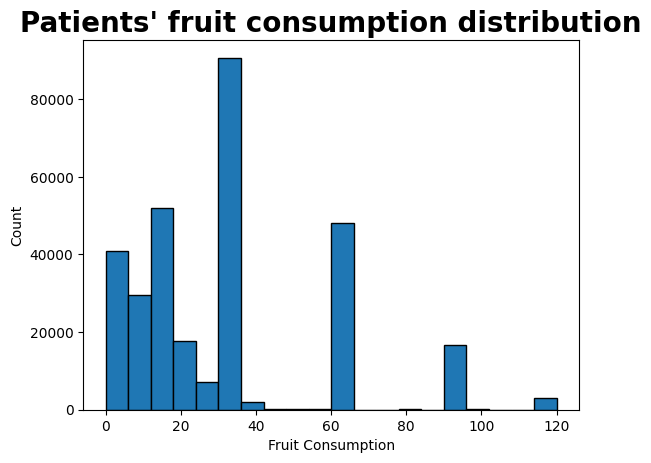

In [75]:
#Distribution of the values of the features "Fruit_Consumption"

print(diseases_df['Fruit_Consumption'].describe())
print()

diseases_df['Fruit_Consumption'].hist(bins=20, edgecolor="black", grid=False)
plt.xlabel("Fruit Consumption")
plt.ylabel("Count")
plt.title("Patients' fruit consumption distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the fruit consumption of the principal "mass" is between 0 and 35. We can see also see that there is a "mass" between 60 and 65, between 90 and 95.

count    308854.000000
mean         15.110441
std          14.926238
min           0.000000
25%           4.000000
50%          12.000000
75%          20.000000
max         128.000000
Name: Green_Vegetables_Consumption, dtype: float64



[]

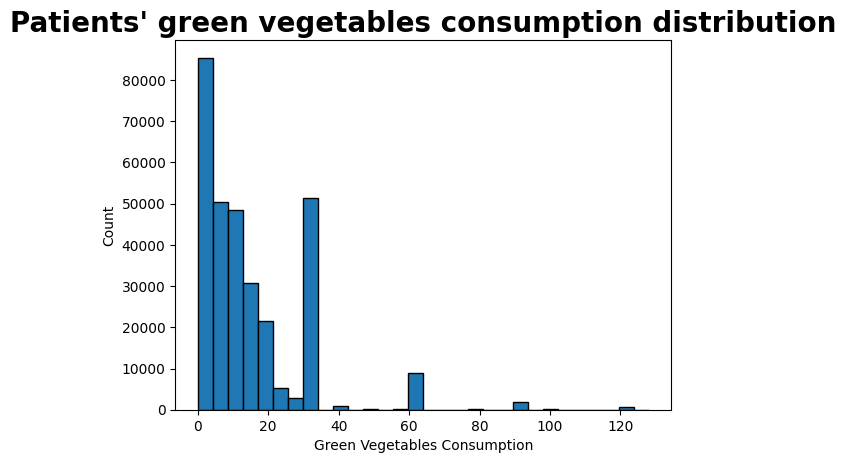

In [76]:
#Distribution of the values of the features "Green_Vegetables_Consumption"

print(diseases_df['Green_Vegetables_Consumption'].describe())
print()

diseases_df['Green_Vegetables_Consumption'].hist(bins=30, edgecolor="black", grid=False)
plt.xlabel("Green Vegetables Consumption")
plt.ylabel("Count")
plt.title("Patients' green vegetables consumption distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the green vegetables consumption of the principal "mass" is between 0 and 35. We can see that there are outlier values such that around 60 and more.

count    308854.000000
mean          6.296616
std           8.582954
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         128.000000
Name: FriedPotato_Consumption, dtype: float64



[]

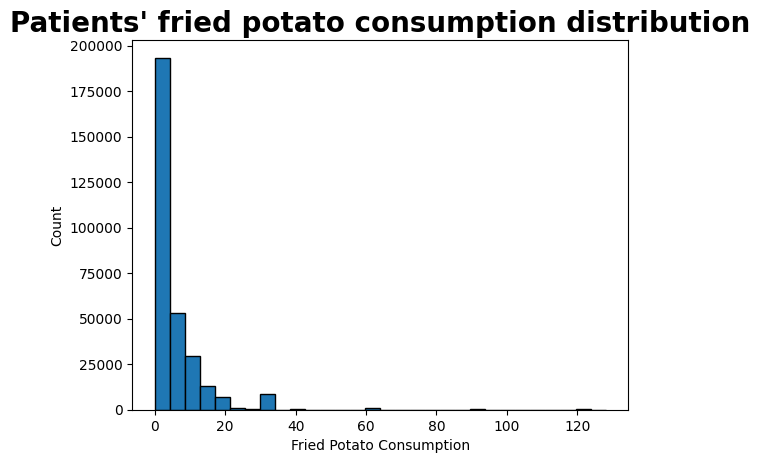

In [77]:
#Distribution of the values of the features "FriedPotato_Consumption"

print(diseases_df['FriedPotato_Consumption'].describe())
print()

diseases_df['FriedPotato_Consumption'].hist(bins=30, edgecolor="black", grid=False)
plt.xlabel("Fried Potato Consumption")
plt.ylabel("Count")
plt.title("Patients' fried potato consumption distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the range of the fried potato consumption of the principal "mass" is between 0 and 20. We can see that there are outlier values such that around 40 and more.

count    308854.000000
mean         54.835278
std          18.078704
min          21.000000
25%          42.000000
50%          57.000000
75%          67.000000
max          85.000000
Name: Age, dtype: float64



[]

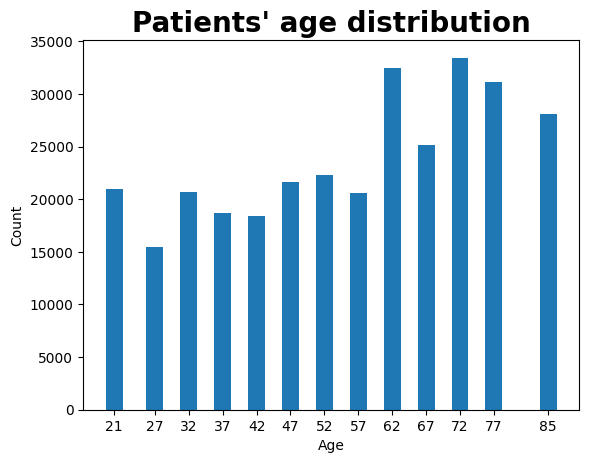

In [78]:
import numpy as np

#Distribution of the values of the features "Age"

print(diseases_df['Age'].describe())
print()

num_categories = np.arange(len(diseases_df['Age'].unique()))
bar_width = 2.5

plt.bar(diseases_df['Age'].unique(), diseases_df['Age'].value_counts(), width=bar_width)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Patients' age distribution", size = 20, fontweight = "bold")
plt.xticks(diseases_df['Age'].unique())

plt.plot()

**Observations** : We can see that all the ages are represented (Recall that each value represents an interval of ages) in a relative uniform way (a little bit more old patients).

####Categorial Values




count    308854.000000
mean          2.530448
std           1.031224
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: General_Health, dtype: float64



[]

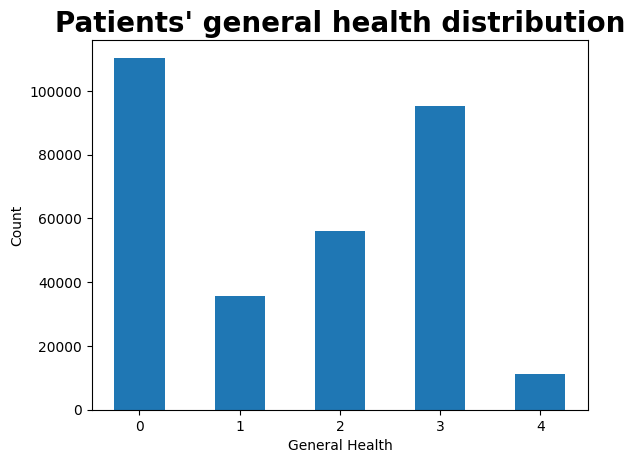

In [79]:
#Distribution of the values of the features "General_Health"

print(diseases_df['General_Health'].describe())
print()

num_categories = np.arange(len(diseases_df['General_Health'].unique()))
bar_width = 0.5

plt.bar(diseases_df['General_Health'].unique(), diseases_df['General_Health'].value_counts(), width=bar_width)

plt.xlabel("General Health")
plt.ylabel("Count")
plt.title("Patients' general health distribution", size = 20, fontweight = "bold")
plt.xticks(diseases_df['General_Health'].unique())

plt.plot()

**Observations** : We can see that there is the most people who are with general health "Poor" (value 0) or "Very Good" (value 3). There is not many people with general health "Excellent" (value 4)

count    308854.000000
mean          0.775062
std           0.417542
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Exercise, dtype: float64



[]

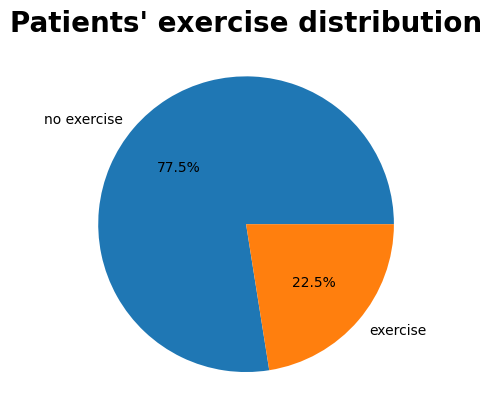

In [80]:
#Distribution of the values of the features "Exercise"

print(diseases_df['Exercise'].describe())
print()

distribution = [diseases_df[diseases_df["Exercise"] == 1].shape[0], diseases_df[diseases_df["Exercise"] == 0].shape[0]]
plt.pie(distribution, labels = ["no exercise", "exercise"], autopct = '%1.1f%%')
plt.title("Patients' exercise distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the most of the patients do not do sport (value 0).

count    308854.000000
mean          0.080850
std           0.272606
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Heart_Disease, dtype: float64



[]

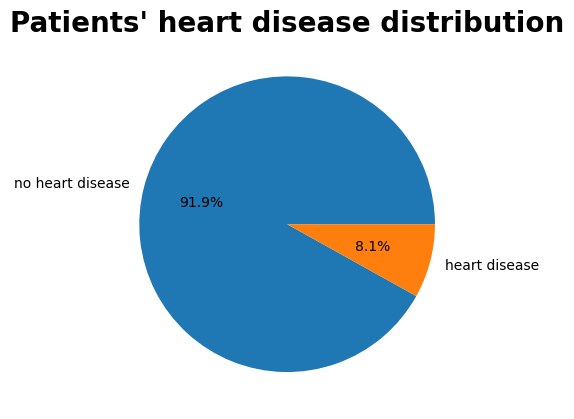

In [81]:
#Distribution of the values of the features "Heart_Disease"

print(diseases_df['Heart_Disease'].describe())
print()

distribution = [diseases_df[diseases_df["Heart_Disease"] == 0].shape[0], diseases_df[diseases_df["Heart_Disease"] == 1].shape[0]]
plt.pie(distribution, labels = ["no heart disease", "heart disease"], autopct = '%1.1f%%')
plt.title("Patients' heart disease distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the most of the patients do not suffer of heart diseases.

count    308854.000000
mean          0.097114
std           0.296113
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Skin_Cancer, dtype: float64



[]

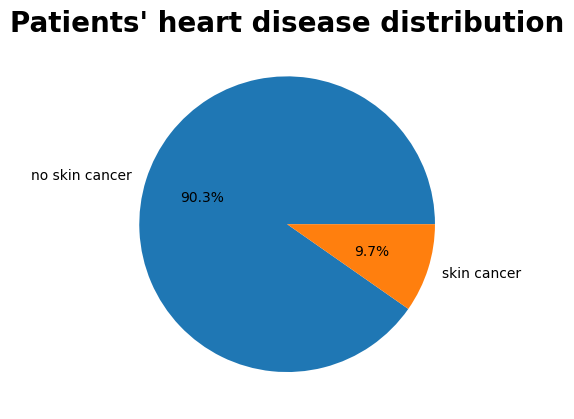

In [82]:
#Distribution of the values of the features "Skin_Cancer"

print(diseases_df['Skin_Cancer'].describe())
print()

distribution = [diseases_df[diseases_df["Skin_Cancer"] == 0].shape[0], diseases_df[diseases_df["Skin_Cancer"] == 1].shape[0]]
plt.pie(distribution, labels = ["no skin cancer", "skin cancer"], autopct = '%1.1f%%')
plt.title("Patients' heart disease distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations**: The most of the patients do not suffer of skin cancer.

count    308854.000000
mean          0.096738
std           0.295602
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Other_Cancer, dtype: float64



[]

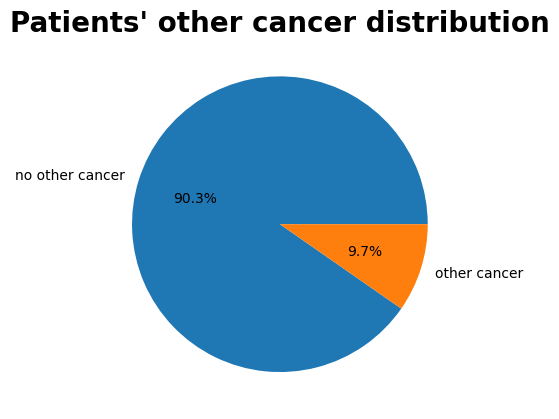

In [83]:
#Distribution of the values of the features "Other_Cancer"

print(diseases_df['Other_Cancer'].describe())
print()

distribution = [diseases_df[diseases_df["Other_Cancer"] == 0].shape[0], diseases_df[diseases_df["Other_Cancer"] == 1].shape[0]]
plt.pie(distribution, labels = ["no other cancer", "other cancer"], autopct = '%1.1f%%')
plt.title("Patients' other cancer distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can observe that the most of the patients do not suffer of other kind of cancers.

count    308854.000000
mean          0.200422
std           0.400316
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Depression, dtype: float64



[]

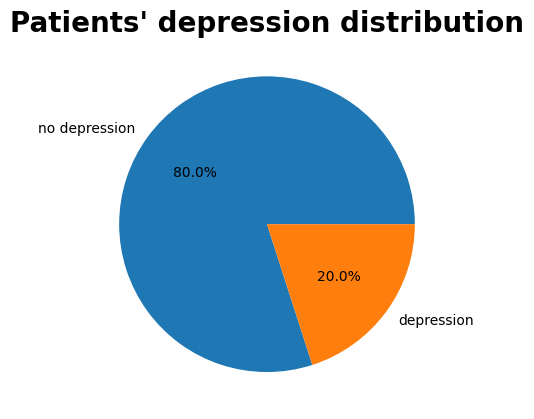

In [84]:
#Distribution of the values of the features "Depression"

print(diseases_df['Depression'].describe())
print()

distribution = [diseases_df[diseases_df["Depression"] == 0].shape[0], diseases_df[diseases_df["Depression"] == 1].shape[0]]
plt.pie(distribution, labels = ["no depression", "depression"], autopct = '%1.1f%%')
plt.title("Patients' depression distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations**: Most of the patients do not suffer of depression, but the proportion of depressive people is quite high (20%).

count    308854.000000
mean          0.214182
std           0.565163
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: Diabetes, dtype: float64



[]

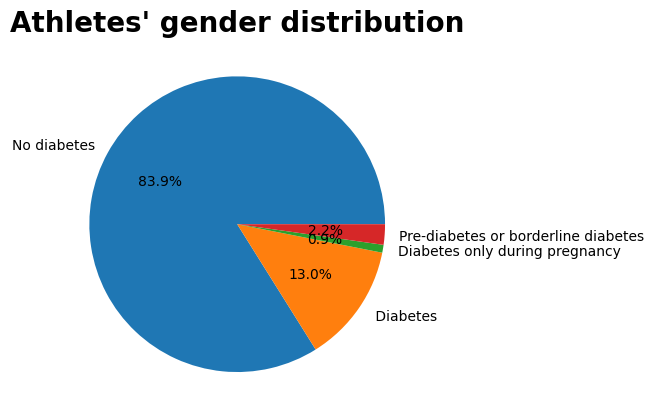

In [85]:
#Distribution of the values of the features "Diabetes"

print(diseases_df['Diabetes'].describe())
print()

distribution = [diseases_df[diseases_df["Diabetes"] == 0].shape[0], diseases_df[diseases_df["Diabetes"] == 1].shape[0],
                diseases_df[diseases_df["Diabetes"] == 2].shape[0], diseases_df[diseases_df["Diabetes"] == 3].shape[0]]
plt.pie(distribution, labels = ["No diabetes", " Diabetes","Diabetes only during pregnancy",
                                "Pre-diabetes or borderline diabetes"], autopct = '%1.1f%%')
plt.title("Athletes' gender distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that the most of the people do not suffer of diabete (value 0). The category "Pre-diabetes or borderline diabetes" and the category "diabetes only during pregnancy" are not a lot represented with both 3%.

count    308854.000000
mean          0.327245
std           0.469208
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Arthritis, dtype: float64



[]

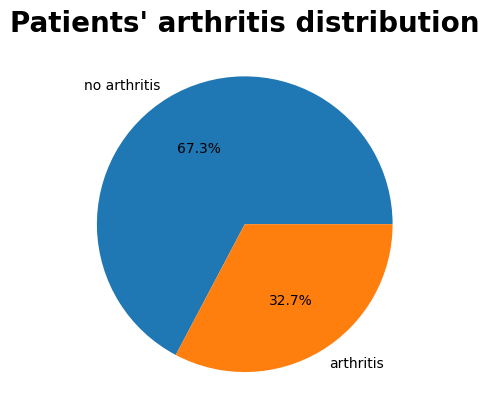

In [86]:
#Distribution of the values of the features "Arthritis"

print(diseases_df['Arthritis'].describe())
print()

distribution = [diseases_df[diseases_df["Arthritis"] == 0].shape[0], diseases_df[diseases_df["Arthritis"] == 1].shape[0]]
plt.pie(distribution, labels = ["no arthritis", "arthritis"], autopct = '%1.1f%%')
plt.title("Patients' arthritis distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that most of the people do not suffer of arthritis with proportion of 67.3%.

count    308854.000000
mean          0.481321
std           0.499652
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Is_Male, dtype: float64



[]

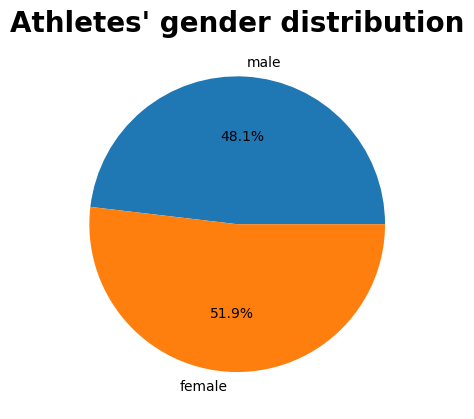

In [87]:
#Distribution of the values of the features "Is_Male"

print(diseases_df['Is_Male'].describe())
print()

distribution = [diseases_df[diseases_df["Is_Male"] == 1].shape[0], diseases_df[diseases_df["Is_Male"] == 0].shape[0]]
plt.pie(distribution, labels = ["male", "female"], autopct = '%1.1f%%')
plt.title("Athletes' gender distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : There is an relatively equal proportion of males and females among the patients.

count    308854.000000
mean          0.405577
std           0.491004
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Smoking_History, dtype: float64



[]

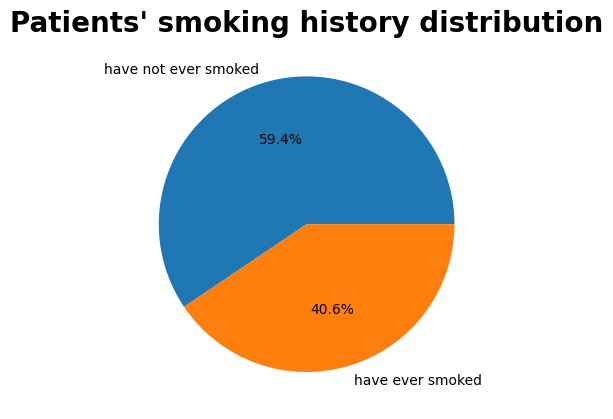

In [88]:
#Distribution of the values of the features "Smoking_History"

print(diseases_df['Smoking_History'].describe())
print()

distribution = [diseases_df[diseases_df["Smoking_History"] == 0].shape[0], diseases_df[diseases_df["Smoking_History"] == 1].shape[0]]
plt.pie(distribution, labels = ["have not ever smoked", "have ever smoked"], autopct = '%1.1f%%')
plt.title("Patients' smoking history distribution", size = 20, fontweight = "bold")
plt.plot()

**Observations** : We can see that there is more than 50% of the patients that have ever smoked.

### **Research Questions**

1) ? של המטופל גורמת לעלייה במשקל של המטופל BMI האם עלייה בערך

2) ? האם עלייה במשקל של המטופל גורמת לעלייה בהסתברות להיות חולה ממחלת לב

3) ? האם צריכת ירקות יותר גדולה אצל נשים מאשר גברים    